continuous model : 

a = 
-83.33333 0.0 
1.0 0.0 

b = 
16465.3703 
0.0 

c = 
1.0 0.0 
0.0 1.0 




<Figure size 640x480 with 0 Axes>

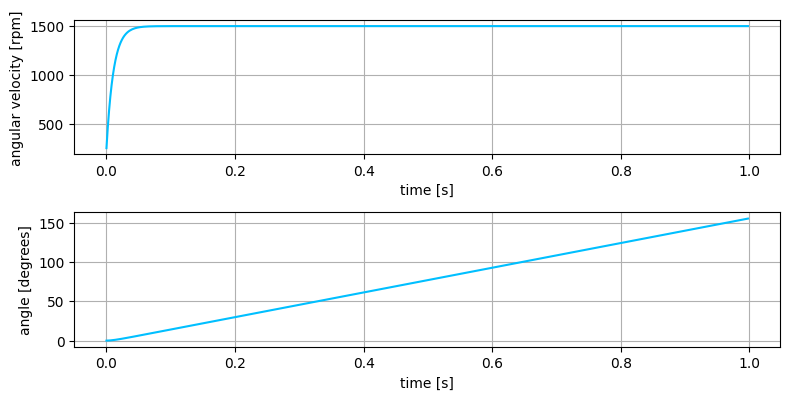

In [52]:
import numpy
import matplotlib.pyplot as plt
import LibsControl

i_max    = 0.795    #A,     max current
rpm_free = 1500     #rpm,   on max current
tau      = 0.012    #12ms,  motor time constant


rad_free = (rpm_free/60.0)*(2.0*numpy.pi) #rpm to rad/s

#sampling frequency, 500Hz
dt       = 1.0/500.0


mat_a = numpy.zeros((2, 2))
mat_b = numpy.zeros((2, 1))
 
mat_a[0][0] = -1.0/tau
mat_a[1][0] = 1.0
    
mat_b[0][0] = (rad_free/i_max)*(1.0/tau)


ds   = LibsControl.DynamicalSystem(mat_a, mat_b, dt=dt)

print(str(ds))

steps = 500
t_result = numpy.arange(steps)*dt
#plot system open loop step response
u_result, x_result, y_result = ds.step_response(amplitudes = i_max, steps=steps)

y_result[:, 0]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm
LibsControl.plot_open_loop_response(t_result, y_result, "open_loop_response", labels=["angular velocity [rpm]", "angle [degrees]"])


controller


k=
 [[0.00627266 0.84664735]] 

ki=
 [[4.36738257e-18 3.16227766e+01]] 






<Figure size 640x480 with 0 Axes>

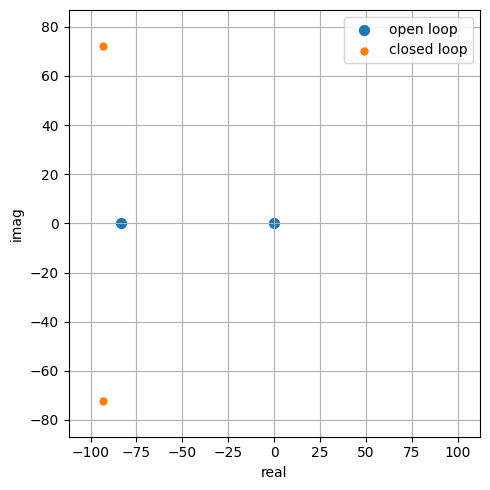

In [53]:
q = numpy.array([ [0.0, 0.0], [0.0, 1.0] ] )
r = numpy.array( [ [0.001] ]) 

lqri = LibsControl.LQRISolver(ds.mat_a, ds.mat_b, ds.mat_c, q, r, dt)

k, ki    = lqri.solve()


#print solved controller matrices
print("controller\n\n")
print("k=\n", k, "\n")
print("ki=\n", ki, "\n")
print("\n\n")


#plot poles, both : open and closed loop
re_ol, im_ol, re_cl, im_cl = lqri.get_poles()
LibsControl.plot_poles(re_ol, im_ol, re_cl, im_cl, "poles.png")


<Figure size 640x480 with 0 Axes>

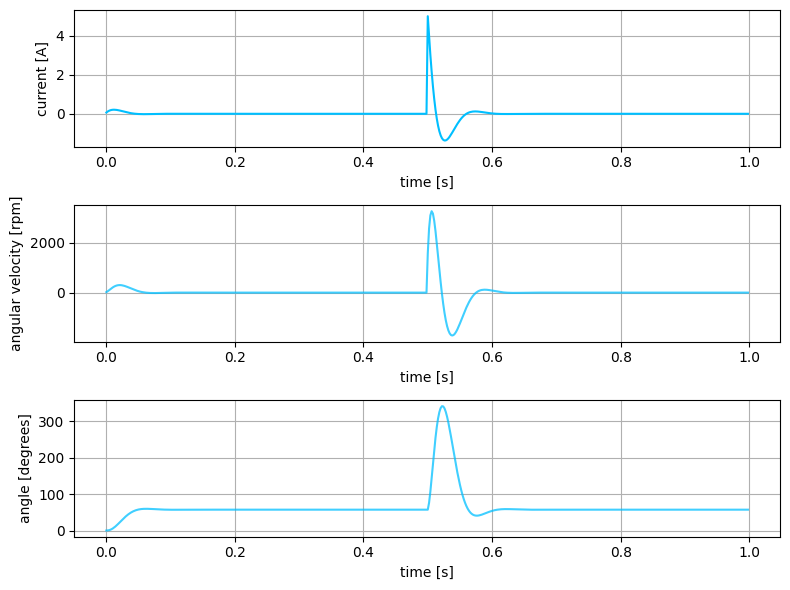

In [54]:
#required state
xr = numpy.array([[0.0, 1.0]]).T

#step response
u_result, x_result, y_result, = lqri.closed_loop_response(xr, steps, disturbance = True)

x_result[:, 0]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm
x_result[:, 1]*= 360.0/(2.0*numpy.pi) #convert rad to deg

LibsControl.plot_closed_loop_response(t_result, u_result, x_result, file_name = "closed_loop_response.png", u_labels = ["current [A]"], x_labels = ["angular velocity [rpm]", "angle [degrees]"] )

   